# Final Project - HDS 5210 
Spring 2022

**Instructions**: 

Your project should include data from at least three distinct types of sources.  For example: AWS S3, Relational Databases, Internet, Web Services, local files.  List what data sources you're planning to use.

Your project should include data that comes in different file formats.  For example: HL7, EDI, HTML, CSV, Excel, JSON, XML.  List what data formats you're planning to use.

What purpose would your project serve in a real work setting?  Take a couple of paragraphs to write down why this is an interesting product.

### **Introduction**

**Description:** This HDS 5210 course project is based on an on-going research study to evaluate the social determinants of health (SDOH) most associated with a lack of access to Medication Assisted Treatment (MAT) care for OUD across counties in the US. The HDS 5210 course project will focus on the Python data management topics covered in class such as retrieving, merging, aggregating & summarizing data. The final product for this class project will be descriptive/summary statistics and visualizations.

**Purpose/Problem Applicability**

*Context*: The opioid epidemic at the forefront of public discourse in the United States in recent years is of great concern due to the devastating consequences and long-term health problems from the reliance and misuse of opioids. While there are treatments for opioid use disorder (OUD), there seems to be barriers to getting the treatment.

*Purpose in Real-World Setting*:
Determining the factors that could inhibit care for OUD would give policy makers and other key decision makers the ability to see where programs and funding are necessary to target specific groups, in order to equalize access to OUD care. If funding and programs could be targeted towards high-risk groups to improve access to OUD treatment at MAT facilities, it could lead to increased access to care and potentially help lessen the opioid epidemic in the United States. 

**Data Sources:** Multiple files from the internet (accessed directly using pandas) & local files will be used as follows: See Section A.1. below.

SDOH variables were obtained from the County Health Rankings and Roadmaps ([CHR&R], 2022) data assets for 2018 (includes a two-year lag), while access to MAT care was sourced from the American Foundation for Health Research ([amfAR], 2022) for those counties with available data in 2017. The CHR&R data included a sample of 3,193 counties while the MAT distance data included a sample of 3,214 US counties across the fifty states, DC and Puerto Rico.


*References:*

American Foundation for Aids Research (2022). Distance to Nearest Substance Abuse Facility Providing MAT (2017). Retrieved from https://ehe.amfar.org/data/dist_MAT (Retrieved February 24, 2022)

County Health Rankings & Roadmaps (2022). 2018 County health rankings national data. https://www.countyhealthrankings.org/sites/default/files/2018%20County%20Health%20Rankings%20Data%20-%20v2.xls (Retrieved February 24, 2022)

Madras, B. K., N. J. Ahmad, J. Wen, J. Sharfstein, and the Prevention, Treatment, and Recovery Working Group of the Action Collaborative on Countering the U.S. Opioid Epidemic (2020). Improving Access to Evidence-Based Medical Treatment for Opioid Use Disorder: Strategies to Address Key Barriers within the Treatment System. NAM Perspectives. Discussion Paper, Washington, DC. https://doi.org/10.31478/202004b

****
**Preliminary Steps** 
****

##### Import Packages/Utilities

In [1]:
#Packages/Utilities
#Base packages
import numpy as np
import pandas as pd

#for reading in data
import requests
import csv
from contextlib import closing

#for plotting
import matplotlib.pyplot as plt

#for SQL queries
import pandasql as ps

#for directory & folder paths
from pathlib import Path
HOME = str(Path.home())

#for dataframe profiling
import pandas_profiling as pp

#for Seaborn PLots
import seaborn as sns

#for function/docsting Tests
import doctest
from doctest import testmod

#run the header syntax (for web data scraping/imports) 
headers = { "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36" }
#Note(from Instructor): you'll need to fetch the data using the following syntax to include headers that make the web server think you're a real web browser.


##### Create Utility Functions (for repetitive tasks)

In [2]:
#get dataframe shape & columns
def df_attributes(dataframe): 
    """(string) -> tuple, list    
    This function prints out the shape & lists the columns of a data frame. 
    Parameters: dataframe=> the dataframe to check shape
    
    >>> df_attribs.shape
    (4, 3)
    >>> len(df_attribs.columns)
    3
    """
    print('Shape:' , dataframe.shape)
    print()
    print('Columns:' , dataframe.columns)
    print()
    #print('Info:'', dataframe.info())
    #dataframe.head()
    return

In [3]:
#perform dataframe manipulations using SQL syntax, inluding joins, aggregation etc.
def df_sqlQuery(query_sytax): 
    """(string) -> dataframe (n x m)   
    This function performs SQL joins on dataframes and outputs a dataframe.
    Parameters: query_sytax=> the SQL query syntax
    
    >>> len(output_nulls.columns)
    3
    >>> output_nulls.shape
    (0, 3)
    
    """
    df_out = ps.sqldf(query_sytax, globals())     
    return df_out

In [4]:
#get the medians of a column by state
def get_Median(df, groupby_list, columnslist):
    """(str, list, list) -> dataframe (n x m)
    This function aggregates the median value(s) of a field or list of fields. 
    Parameters: df=> the dataframe; groupby_list=> a list of columns to group by; columnslist=> a list of columns
    
    >>> len(output_Medians.columns)
    3
    >>> output_Medians.shape
    (5, 3)
    """
    df.loc[~df.index.duplicated(), :] #for dropping duplicated rows when rerunning, remerging etc.
    df.loc[:, ~df.columns.duplicated()] #for dropping duplicated columns when rerunning, remerging etc.
    
    value = df.groupby(groupby_list)[columnslist].median()
    df_median = value.add_suffix('_median').reset_index()
    #df_median = [name + '_median' for name in columnslist]
    return df_median


##### Test Utility Functions (doctests)

In [5]:
#Test the df_attributes Function
#create a sample dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}
  
#creating a dataframe from list
df_attribs = pd.DataFrame(dict)

#docString test
doctest.run_docstring_examples(df_attributes, globals(), verbose=True)

Finding tests in NoName
Trying:
    df_attribs.shape
Expecting:
    (4, 3)
ok
Trying:
    len(df_attribs.columns)
Expecting:
    3
ok


In [6]:
#Test the SQL Query Function
#let's take a look at these missing values

#create a sample dictionary of lists
sql_query_nulls = """
    select *
    from df_attribs 
    where 'First Score' is null
    """
#call the SQL Utility Function
output_nulls = df_sqlQuery(query_sytax=sql_query_nulls)

#print(len(output_nulls.columns))
#print(output_nulls.shape)

# #docString test
doctest.run_docstring_examples(df_sqlQuery, globals(), verbose=True)

Finding tests in NoName
Trying:
    len(output_nulls.columns)
Expecting:
    3
ok
Trying:
    output_nulls.shape
Expecting:
    (0, 3)
ok


In [7]:
#Test the get_Median Function
test_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df_test = pd.DataFrame(test_data)
df_test

groupBy_list=['Team']
input_columns=['Rank', 'Points']
output_Medians = get_Median(df_test, groupBy_list, input_columns)
#output_Medians
#print(len(output_Medians.columns))
#print(output_Medians.shape)

#docString test
doctest.run_docstring_examples(get_Median, globals(), verbose=True)

Finding tests in NoName
Trying:
    len(output_Medians.columns)
Expecting:
    3
ok
Trying:
    output_Medians.shape
Expecting:
    (5, 3)
ok


****
#### **Section A: Data Access & Formats**
Rubric: 5 points
Uses data from at least two different sources: local file, internet, web service, relational database, AWS S3, etc; and formats: CSV, JSON, database, XML, Excel, etc.
****

**1.Data Sources**

Multiple files from the internet (accessed directly using pandas) & local files will be used as follows:

*Web Services via the Internet* 
- (1) County Health Rankings (county SDOH): "https://www.countyhealthrankings.org/sites/default/files/analytic_data2018_0.csv"
- (2) Rural-Urban Continuum Codes (rurality indicator): "https://www.ers.usda.gov/webdocs/DataFiles/53251/ruralurbancodes2013.xls?v=4386"

*Local File*
- (3) amfAR Opioid & Health Indicators Database (distance to MAT Facility). The original source is "https://opioid.amfar.org/indicator/SMAT_fac#.csv"

**2.Data Formats**

Instruction: Your project should include data that comes in different file formats.  For example: HL7, EDI, HTML, CSV, Excel, JSON, XML.  List what data formats you're planning to use.

**Double-click to enter your answer**

- CSV (County Health Rankings, Distance to MAT Facility)
- Excel (Rural-Urban Continuum Code)

**2.1 Data Access, Formats & Cleaning** (importing all 3 data sets)

2.1.1 Bring in the CHR data set

In [8]:
#(1 - County Health Rankings Data) - Web File in CSV format
# Define the remote URL
url1 = "https://www.countyhealthrankings.org/sites/default/files/analytic_data2018_0.csv"
with closing(requests.get(url1, stream=True)) as r:
    f1 = (line.decode('utf-8') for line in r.iter_lines())
    csv_reader1 = csv.reader(f1, delimiter=',', quotechar='"')
    for row in csv_reader1:
        #print(row)
        df_chr = pd.DataFrame(csv_reader1)

# print(df_chr.shape)
# df_chr.head()

#call the dataframe Attributes Utility Function
df_attributes(df_chr)
df_chr.head()

Shape: (3195, 508)

Columns: RangeIndex(start=0, stop=508, step=1)



,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,506,507
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2018,,6658.1139453,3537400,896862151,...,,,,,,,,,,
2,01,000,01000,AL,Alabama,2018,,9642.4120328,76851,13617223,...,,,,,,,,,,
3,01,001,01001,AL,Autauga County,2018,1,9409.2947663,851,156697,...,,,,,,,,,,
4,01,003,01003,AL,Baldwin County,2018,1,7467.5966638,2740,554671,...,,,,,,,,,,


*Comments: The CHR data looks odd with the column headers, this calls for some data transformation/cleaning...*

In [9]:
#(2 - amfAR Data) - Local Desktop File in CSV format
file_to_open = Path.home()/'hds5210-2022/final/amfARDB_dist_MAT_countydata_2019-08-30.csv'
df_amfar = pd.read_csv(file_to_open)

# print(df_amfar.shape)
# df_amfar.head()

#call the dataframe Attributes Utility Function
df_attributes(df_amfar)
df_amfar.head()

Shape: (3214, 8)

Columns: Index(['STATE', 'STATEABBREVIATION', 'COUNTY', 'STATEFP', 'COUNTYFP',
       'INDICATOR', 'YEAR', 'VALUE'],
      dtype='object')



,STATE,STATEABBREVIATION,COUNTY,STATEFP,COUNTYFP,INDICATOR,YEAR,VALUE
0,Alabama,AL,Autauga County,1,1,dist_MAT,2017,23.50
1,Alabama,AL,Baldwin County,1,3,dist_MAT,2017,19.68
2,Alabama,AL,Barbour County,1,5,dist_MAT,2017,17.00
3,Alabama,AL,Bibb County,1,7,dist_MAT,2017,19.00
4,Alabama,AL,Blount County,1,9,dist_MAT,2017,13.62


*Comments: The amfAR (distance to MAT) data looks ok, but the 'Value' field will need to be renamed to distance...*

In [10]:
#(3 - rurality Data)- Web File in XLS format
url2 = 'https://www.ers.usda.gov/webdocs/DataFiles/53251/ruralurbancodes2013.xls?v=4386'
r = requests.get(url2)
open('temp.xls', 'wb').write(r.content)
df_rural = pd.read_excel('temp.xls')

df_attributes(df_rural)
df_rural.head()

Shape: (3234, 6)

Columns: Index(['FIPS', 'State', 'County_Name', 'Population_2010', 'RUCC_2013',
       'Description'],
      dtype='object')



,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6.0,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1.0,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1.0,Metro - Counties in metro areas of 1 million p...


**2.2 Data Cleaning**

Next Some Data Management/Cleaning

**a. Data Cleaning (CHR Data Set)**

In [11]:
#(1 - County Health Rankings Data)
#convert the first row to column header 
# Assign row as column headers
df_chr.columns = df_chr.iloc[0]

#Convert row to header and remove the row
df_chr2 = df_chr.rename(columns=df_chr.iloc[0]).loc[1:]

# print(df_chr2.shape)
# df_chr2.head()

#call the dataframe Attributes Utility Function
df_attributes(df_chr)
df_chr2.head()

Shape: (3195, 508)

Columns: Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'v001_rawvalue', 'v001_numerator', 'v001_denominator',
       ...
       'v013_rawvalue', 'v016_rawvalue', 'v017_rawvalue', 'v025_rawvalue',
       'v026_rawvalue', 'v027_rawvalue', 'v031_rawvalue', 'v032_rawvalue',
       'v035_rawvalue', 'v097_rawvalue'],
      dtype='object', name=0, length=508)



,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2018,,6658.1139453,3537400,896862151,...,,,,,,,,,,
2,01,000,01000,AL,Alabama,2018,,9642.4120328,76851,13617223,...,,,,,,,,,,
3,01,001,01001,AL,Autauga County,2018,1,9409.2947663,851,156697,...,,,,,,,,,,
4,01,003,01003,AL,Baldwin County,2018,1,7467.5966638,2740,554671,...,,,,,,,,,,
5,01,005,01005,AL,Barbour County,2018,1,8929.4749816,425,75161,...,,,,,,,,,,


In [12]:
#drop all rows with countycode=0 (these are US & state aggregates... not needed)
df_chr3 = df_chr2[df_chr2['countycode'] != str('000')]

# print(df_chr3.shape)
# df_chr3.head()

#call the dataframe Attributes Utility Function
df_attributes(df_chr3)
#df_chr3.head()

Shape: (3142, 508)

Columns: Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'v001_rawvalue', 'v001_numerator', 'v001_denominator',
       ...
       'v013_rawvalue', 'v016_rawvalue', 'v017_rawvalue', 'v025_rawvalue',
       'v026_rawvalue', 'v027_rawvalue', 'v031_rawvalue', 'v032_rawvalue',
       'v035_rawvalue', 'v097_rawvalue'],
      dtype='object', name=0, length=508)



In [13]:
#check that the drops are accurate
df_drops = df_chr2[df_chr2['countycode'] == str('000')]

#call the dataframe Attributes Utility Function
df_attributes(df_drops)
#print(df_drops.shape)
#df_drops

#ok, looks good!... 52 rows have been dropped; will not print dataframe for brevity...

Shape: (52, 508)

Columns: Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'v001_rawvalue', 'v001_numerator', 'v001_denominator',
       ...
       'v013_rawvalue', 'v016_rawvalue', 'v017_rawvalue', 'v025_rawvalue',
       'v026_rawvalue', 'v027_rawvalue', 'v031_rawvalue', 'v032_rawvalue',
       'v035_rawvalue', 'v097_rawvalue'],
      dtype='object', name=0, length=508)



**b. Variable Selection (CHR & amFar Data sets)**

In [14]:
#Next, select variables of interest & rename to more intuitive names

#1) Select columns of interest
#1.1 - CHR data (Social Determinants of Health Attributes)
columns_list_CHR = ['statecode', 'countycode', 'fipscode', 'state', 'county', 
                'v021_rawvalue', 'v069_rawvalue', 'v116_rawvalue',  'v023_rawvalue','v024_rawvalue', 
                'v044_rawvalue', 'v063_rawvalue', 'v065_rawvalue', 'v082_rawvalue', 'v140_rawvalue', 
                'v141_rawvalue','v142_rawvalue', 'v043_rawvalue', 'v135_rawvalue', 'v015_rawvalue', 
                'v148_rawvalue', 'v051_rawvalue', 'v052_rawvalue', 'v053_rawvalue', 'v054_rawvalue',
                'v055_rawvalue', 'v081_rawvalue', 'v080_rawvalue', 'v056_rawvalue', 'v126_rawvalue', 
                'v059_rawvalue', 'v057_rawvalue', 'v058_rawvalue']

sdoh_df = df_chr3[columns_list_CHR]

#resetting the DataFrame index
sdoh_df = sdoh_df.reset_index()
sdoh_df.head()

#1.2 - MAT data (Medication Assisted Treatment)
MAT_df = df_amfar.drop(['INDICATOR', 'YEAR'], axis = 1)
MAT_df.head()

#1.3 - Rural data (Urban-Rural County Codes)
#keeping all variables in this file...(using the .ix[:,:] method)
#RUCC_df = df_rural.ix[0:, 0:]  
#RUCC_df.head()

#using iloc[row slicing, column slicing]
RUCC_df = df_rural.iloc [0:, 0:]
RUCC_df.head()


#2) Rename Variables
#2.1  - CHR data
rename_list_CHR = {
    #Education
    'v021_rawvalue':'HighSchoolGrad', 'v069_rawvalue':'SomeCollege','v116_rawvalue':'ReadProficiency',  

    #Employment
    'v023_rawvalue':'Unemployment',

    #Income
    'v024_rawvalue':'KidsinPoverty', 'v044_rawvalue':'IncomeInequality', 
    'v063_rawvalue':'HouseholdIncome','v065_rawvalue':'KidsInSchoolLunch',

    #Family and Social Support
    'v082_rawvalue':'Kidswith1Parent','v140_rawvalue':'SocAssociations',
    'v141_rawvalue':'BlkVsWT_ResSegregation', 'v142_rawvalue':'nonWTVsWT_ResSegregation',  

    #Community Safety
     'v043_rawvalue':'ViolentCrimes', 'v135_rawvalue':'InjuryDeaths',
     'v015_rawvalue':'Homicides', 'v148_rawvalue':'FirearmDeaths',

    #Demographics
    'v051_rawvalue':'CountyPopulation','v052_rawvalue':'Minors','v053_rawvalue':'Adults','v054_rawvalue':'NHAA',
    'v055_rawvalue':'AIAN','v081_rawvalue':'Asian','v080_rawvalue':'NHPI','v056_rawvalue':'Hispanic',  
        
    'v126_rawvalue':'NHWhite','v059_rawvalue':'PoorEnglish','v057_rawvalue':'Females',
    'v057_rawvalue':'Females','v058_rawvalue':'Rural'     
    }

sdoh_df.rename(columns= rename_list_CHR, inplace=True)
sdoh_df.head()

#2.2  - amFar data (Medication Assisted Treatment)
#rename the column called value - this represents the average distance to a MAT facility
rename_list_amfAR = {'VALUE':'distance_MAT'}
MAT_df.rename(columns= rename_list_amfAR, inplace=True)
MAT_df.head()

#2.3 - rural data (Urban-Rural Codes)
#No neeed to rename...keeping the same names for now


,STATE,STATEABBREVIATION,COUNTY,STATEFP,COUNTYFP,distance_MAT
0,Alabama,AL,Autauga County,1,1,23.50
1,Alabama,AL,Baldwin County,1,3,19.68
2,Alabama,AL,Barbour County,1,5,17.00
3,Alabama,AL,Bibb County,1,7,19.00
4,Alabama,AL,Blount County,1,9,13.62


****
#### **Section B: Data Merging** (and more data cleaning!)

Rubric: 5 points
Data from multiple sources has to be joined together at least twice
****

Next, Merge data sets
(this will be split into 2 separate merges to follow the rubric... ideally all 3 files can be merged in one go)


**B.1. Join CHR data to amfAR data**

In [15]:
#first, check columns for both tables

#call the dataframe Attributes Utility Function
df_attributes(MAT_df)
df_attributes(sdoh_df)

Shape: (3214, 6)

Columns: Index(['STATE', 'STATEABBREVIATION', 'COUNTY', 'STATEFP', 'COUNTYFP',
       'distance_MAT'],
      dtype='object')

Shape: (3142, 34)

Columns: Index(['index', 'statecode', 'countycode', 'fipscode', 'state', 'county',
       'HighSchoolGrad', 'SomeCollege', 'ReadProficiency', 'Unemployment',
       'KidsinPoverty', 'IncomeInequality', 'HouseholdIncome',
       'KidsInSchoolLunch', 'Kidswith1Parent', 'SocAssociations',
       'BlkVsWT_ResSegregation', 'nonWTVsWT_ResSegregation', 'ViolentCrimes',
       'InjuryDeaths', 'Homicides', 'FirearmDeaths', 'CountyPopulation',
       'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI', 'Hispanic',
       'NHWhite', 'PoorEnglish', 'Females', 'Rural'],
      dtype='object', name=0)



In [16]:
#next, merge the sdoh & MAT data sets  
sql_query1 = """
    select distinct a.STATE as MAT_STATE, a.STATEABBREVIATION as MAT_STATEABBREVIATION
        ,a.COUNTY as MAT_COUNTY, a.STATEFP as MAT_STATEFP, a.COUNTYFP as MAT_COUNTYFP
        ,a.distance_MAT
        ,b.*    
    from MAT_df a
    left join sdoh_df b
    on a.STATEFP = b.statecode
    and a.COUNTYFP = b.countycode
    """

#call the SQL Utility Function
sdoh_MAT = df_sqlQuery(query_sytax=sql_query1)
sdoh_MAT.head()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,Adults,NHAA,AIAN,Asian,NHPI,Hispanic,NHWhite,PoorEnglish,Females,Rural
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,0.1472859824,0.1904865021,0.0048541937,0.0114046485,0.0010105385,0.0268875415,0.75,0.0083273898,0.5128843655,0.4200216232
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,0.1970819369,0.0904283118,0.0077099006,0.0107497495,0.0005945446,0.0441641135,0.832021979,0.0081880922,0.5145783289,0.4227909911
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,0.1801656075,0.475139611,0.0063161949,0.0045060659,0.0017331023,0.0421336414,0.4645099172,0.0151936998,0.4693240901,0.677896347
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,0.1543081747,0.2161816014,0.0037980833,0.0019873692,0.0011924215,0.0249966877,0.7441593428,0.0044813743,0.4636311443,0.6835260746
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,0.1798662138,0.0143490919,0.0062733953,0.0026514626,0.0011264384,0.0906869541,0.8746707334,0.0187850605,0.5061347567,0.8995150204


**B.2. Join dataframe output from (B.1) above to the Urban-Rural Codes data**

In [17]:
#first, check shape & columns for both tables

In [18]:
#check shape & columns for the MAT & SDOH data merge
#call the dataframe Attributes Utility Function
df_attributes(sdoh_MAT)
sdoh_MAT.head()

Shape: (3214, 40)

Columns: Index(['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY', 'MAT_STATEFP',
       'MAT_COUNTYFP', 'distance_MAT', 'index', 'statecode', 'countycode',
       'fipscode', 'state', 'county', 'HighSchoolGrad', 'SomeCollege',
       'ReadProficiency', 'Unemployment', 'KidsinPoverty', 'IncomeInequality',
       'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
       'SocAssociations', 'BlkVsWT_ResSegregation', 'nonWTVsWT_ResSegregation',
       'ViolentCrimes', 'InjuryDeaths', 'Homicides', 'FirearmDeaths',
       'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
       'Hispanic', 'NHWhite', 'PoorEnglish', 'Females', 'Rural'],
      dtype='object')



,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,Adults,NHAA,AIAN,Asian,NHPI,Hispanic,NHWhite,PoorEnglish,Females,Rural
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,0.1472859824,0.1904865021,0.0048541937,0.0114046485,0.0010105385,0.0268875415,0.75,0.0083273898,0.5128843655,0.4200216232
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,0.1970819369,0.0904283118,0.0077099006,0.0107497495,0.0005945446,0.0441641135,0.832021979,0.0081880922,0.5145783289,0.4227909911
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,0.1801656075,0.475139611,0.0063161949,0.0045060659,0.0017331023,0.0421336414,0.4645099172,0.0151936998,0.4693240901,0.677896347
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,0.1543081747,0.2161816014,0.0037980833,0.0019873692,0.0011924215,0.0249966877,0.7441593428,0.0044813743,0.4636311443,0.6835260746
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,0.1798662138,0.0143490919,0.0062733953,0.0026514626,0.0011264384,0.0906869541,0.8746707334,0.0187850605,0.5061347567,0.8995150204


In [19]:
#check shape & columns for the RUCC (rural-urban codes) data
#call the dataframe Attributes Utility Function
df_attributes(RUCC_df)
RUCC_df.head()

Shape: (3234, 6)

Columns: Index(['FIPS', 'State', 'County_Name', 'Population_2010', 'RUCC_2013',
       'Description'],
      dtype='object')



,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6.0,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1.0,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1.0,Metro - Counties in metro areas of 1 million p...


In [20]:
#Comments:
#sdoh_MAT.fipscode is 5-digits long (has a leading zero), while RUCC_df.FIPS is 4-digits long (no leading zero)
#it seems both dataframes can be joined using the FIPS codes in each dataset, but with some manipulation of one of the FIPs fields...

###### **B.2-1. Transform County FIPS code on CHR data to match FIPS in amfAR data to facilitate the joins**

In [21]:
#create a new FIPS field in the SDOH file that strips out the leading zeros...
#store the last 4 digits of sdoh_MAT.fipscode in a new column called countyFIPS
sdoh_MAT['FIPS'] = sdoh_MAT['fipscode'].str.slice(1, 5) #i.e. positions 1-4 inclusive

#rename the sdoh_MAT.state field...
#(there are competing state fields in each table, but need to keep all fields in case we need to use 1 or more of these to fill in for missing cases)
sdoh_MAT.rename(columns={'state':'CountyState'}, inplace=True)
#sdoh_MAT['CountyState'].head()

Rural-Urban Continuum Code Descriptions

###### **B.2-2. Now Merge the CHR & amfAR data sets to the RUCC data set**

In [22]:
#next, merge the sdoh_MAT & rural codes data sets 
sql_query2 = """
    select distinct a.*
        ,b.FIPS as RUCC_FIPS, b.State as RUCC_State, b.County_Name as RUCC_CountyName
        ,b.Population_2010 as RUCC_Popn2010, b.RUCC_2013 as RUCC_2013Category
        ,substr(b.FIPS, 1, 4) as RUCC_FIPS2
    from sdoh_MAT a
    left join RUCC_df b
    on a.FIPS = substr(b.FIPS, 1, 4)    
    and a.MAT_STATEABBREVIATION=b.State
    """
#alternate join syntax
#on substr(a.fipscode, 2, 5) = substr(b.FIPS, 1, 4)

#call the SQL Utility Function
sdoh_MAT_RUCC = df_sqlQuery(query_sytax=sql_query2)

#check dataframe
#call the dataframe Attributes Utility Function
df_attributes(sdoh_MAT_RUCC)
#print(sdoh_MAT_RUCC.info())
sdoh_MAT_RUCC.head()

Shape: (3214, 47)

Columns: Index(['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY', 'MAT_STATEFP',
       'MAT_COUNTYFP', 'distance_MAT', 'index', 'statecode', 'countycode',
       'fipscode', 'CountyState', 'county', 'HighSchoolGrad', 'SomeCollege',
       'ReadProficiency', 'Unemployment', 'KidsinPoverty', 'IncomeInequality',
       'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
       'SocAssociations', 'BlkVsWT_ResSegregation', 'nonWTVsWT_ResSegregation',
       'ViolentCrimes', 'InjuryDeaths', 'Homicides', 'FirearmDeaths',
       'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
       'Hispanic', 'NHWhite', 'PoorEnglish', 'Females', 'Rural', 'FIPS',
       'RUCC_FIPS', 'RUCC_State', 'RUCC_CountyName', 'RUCC_Popn2010',
       'RUCC_2013Category', 'RUCC_FIPS2'],
      dtype='object')



,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,PoorEnglish,Females,Rural,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,0.0083273898,0.5128843655,0.4200216232,1001,1001.0,AL,Autauga County,54571.0,2.0,1001
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,0.0081880922,0.5145783289,0.4227909911,1003,1003.0,AL,Baldwin County,182265.0,3.0,1003
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,0.0151936998,0.4693240901,0.677896347,1005,1005.0,AL,Barbour County,27457.0,6.0,1005
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,0.0044813743,0.4636311443,0.6835260746,1007,1007.0,AL,Bibb County,22915.0,1.0,1007
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,0.0187850605,0.5061347567,0.8995150204,1009,1009.0,AL,Blount County,57322.0,1.0,1009


**B.3. Create a reusable list of columns**

In [23]:
#select columns of interest to be analyzed
vars_list = ['distance_MAT', 'HighSchoolGrad', 'SomeCollege',
       'ReadProficiency', 'Unemployment', 'KidsinPoverty', 'IncomeInequality',
       'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
       'SocAssociations', 'BlkVsWT_ResSegregation', 'nonWTVsWT_ResSegregation',
       'ViolentCrimes', 'InjuryDeaths', 'Homicides', 'FirearmDeaths',
       'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
       'Hispanic', 'NHWhite', 'PoorEnglish', 'Females']

**B.4. More Data Cleaning**

###### **B.4-1. Detect & Handle Missing Values**

In [24]:
#Check All Columns for Missing values
def NaNChecks(df):
    """(dataframe) -> dataframe (n x 2)   
    This function checks for missing values & prints the number 
    of missing values (nMiss) for each column (colName) in the data frame.
    
    >>> len(output.columns)
    2
    >>> output.shape
    (47, 2)
    >>> output.columns
    Index(['colName', 'nMiss'], dtype='object')
    """
    #count nulls for each column & put into a dataframe
    NaN_Checks = pd.DataFrame(df.isnull().sum().reset_index())
    
    #rename index names to more-meaningful column names
    NaN_Checks.rename(columns={'index':'colName', 0:'nMiss'}, inplace=True)
    return NaN_Checks

#NaNChecks(sdoh_MAT_RUCC)
NaNChecks(sdoh_MAT_RUCC).head()    

,colName,nMiss
0,MAT_STATE,0
1,MAT_STATEABBREVIATION,0
2,MAT_COUNTY,0
3,MAT_STATEFP,0
4,MAT_COUNTYFP,0


In [25]:
#Comments:
# It appears several variables have significant missing values including ReadProficiency (i.e. looking at the full list ...not printed)
# These will need to be dropped or just not included in any analysis/aggregation, to avoid having a near-empty dataframe. 
#But first, let's take a look at what's going on with all the missing info from the RUCC_df

In [26]:
#Test NaNChecks Function
output = NaNChecks(sdoh_MAT_RUCC)
print(NaNChecks(sdoh_MAT_RUCC).columns)
print(NaNChecks(sdoh_MAT_RUCC).shape)

#docstring Test
doctest.run_docstring_examples(NaNChecks, globals(), verbose=True)

Index(['colName', 'nMiss'], dtype='object')
(47, 2)
Finding tests in NoName
Trying:
    len(output.columns)
Expecting:
    2
ok
Trying:
    output.shape
Expecting:
    (47, 2)
ok
Trying:
    output.columns
Expecting:
    Index(['colName', 'nMiss'], dtype='object')
ok


###### **B.4-2. Investigate Missing Values from the RUCC dataframe**

In [27]:
#check dataframe unique values
RUCC_vars_list = ['State','County_Name']
#np.unique(RUCC_df[RUCC_vars_list].values)

print(RUCC_df.info())
print()

print("RUCC Dataframe Unique Column Values:","\r\n", RUCC_df.nunique(axis=0))
#['FIPS','State','County_Name','Population_2010','RUCC_2013','Description']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS             3234 non-null   int64  
 1   State            3234 non-null   object 
 2   County_Name      3234 non-null   object 
 3   Population_2010  3234 non-null   int64  
 4   RUCC_2013        3232 non-null   float64
 5   Description      3234 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 151.7+ KB
None

RUCC Dataframe Unique Column Values: 
 FIPS               3234
State                56
County_Name        1967
Population_2010    3180
RUCC_2013             9
Description          10
dtype: int64


In [28]:
#Comments:
#that's quite interesting, there are 3234 unique FIPs codes in the RUCC_df table, but almost 3,000 of these are missing in the merged data
#lets' take a closer look to find out what's causing the problem...

In [29]:
#let's take a look at these missing RUCC_ columns
sql_query_checks = """
    select distinct MAT_STATE, MAT_STATEABBREVIATION, MAT_COUNTY, MAT_STATEFP, MAT_COUNTYFP
    ,FIPS, RUCC_FIPS, RUCC_State, RUCC_CountyName, RUCC_Popn2010, RUCC_2013Category
    from sdoh_MAT_RUCC a
    where RUCC_FIPS is null
    """

#call the SQL Utility Function
null_values = df_sqlQuery(query_sytax=sql_query_checks)
null_values.head()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category
0,Alaska,AK,Kusilvak Census Area,2,158,2158,None,None,None,None,None
1,Delaware,DE,Kent County,10,1,0001,None,None,None,None,None
2,Delaware,DE,New Castle County,10,3,0003,None,None,None,None,None
3,Delaware,DE,Sussex County,10,5,0005,None,None,None,None,None
4,District of Columbia,DC,District of Columbia,11,1,1001,None,None,None,None,None


In [30]:
#let's take a look at the non-missing RUCC_ columns
sql_query_checks = """
    select distinct MAT_STATE, MAT_STATEABBREVIATION, MAT_COUNTY, MAT_STATEFP, MAT_COUNTYFP
        ,FIPS, RUCC_FIPS, RUCC_State, RUCC_CountyName, RUCC_Popn2010, RUCC_2013Category
    from sdoh_MAT_RUCC a
    where RUCC_FIPS is not null
    """
#call the SQL Utility Function
noTnull_values = df_sqlQuery(query_sytax=sql_query_checks)
noTnull_values.head()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category
0,Alabama,AL,Autauga County,1,1,1001,1001.0,AL,Autauga County,54571.0,2.0
1,Alabama,AL,Baldwin County,1,3,1003,1003.0,AL,Baldwin County,182265.0,3.0
2,Alabama,AL,Barbour County,1,5,1005,1005.0,AL,Barbour County,27457.0,6.0
3,Alabama,AL,Bibb County,1,7,1007,1007.0,AL,Bibb County,22915.0,1.0
4,Alabama,AL,Blount County,1,9,1009,1009.0,AL,Blount County,57322.0,1.0


In [31]:
#Comments:
#ok! I think I see the issue here... I need to strip off everything from the decimal on the RUCC FIPs column when joining!!!
#this means that I need to go back & redo the joins!!!

In [32]:
#Post-Investigation Comments/Verdict (i.e. after redoing the joins):
#even after addding a substring function to strip off the trailing decimals, the results (missing values) haven't changed...
#but this won't be a big problem since we have other FIPS columns from other contributing dataframes to the merge...
#we can pretty much ignore these RUCC_ variables...

In [33]:
#quick checks...
#sdoh_MAT_RUCC.info()

###### **B.4-3. Transform Several Field Types to Numeric**

In [34]:
#next, need to change several field types to numeric for the aggregation steps below (e.g. Medians etc.)
# converting values from object to numeric Type
object_varsList = vars_list

sdoh_MAT_RUCC[object_varsList] = sdoh_MAT_RUCC[object_varsList].apply(pd.to_numeric)
sdoh_MAT_RUCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAT_STATE                 3214 non-null   object 
 1   MAT_STATEABBREVIATION     3214 non-null   object 
 2   MAT_COUNTY                3214 non-null   object 
 3   MAT_STATEFP               3214 non-null   int64  
 4   MAT_COUNTYFP              3214 non-null   int64  
 5   distance_MAT              3194 non-null   float64
 6   index                     3136 non-null   float64
 7   statecode                 3136 non-null   object 
 8   countycode                3136 non-null   object 
 9   fipscode                  3136 non-null   object 
 10  CountyState               3136 non-null   object 
 11  county                    3136 non-null   object 
 12  HighSchoolGrad            2669 non-null   float64
 13  SomeCollege               3136 non-null   float64
 14  ReadProf

###### **B.4-4. Drop Missing Cases**

In [35]:
#finally, let's drop missing values (NaNs)

#first we need to drop columns with significant missing data, so we don't end up with an almost empty/empty dataframe...
#drop missing values for select columns i.e.Drop rows that have NaN values on selected columns

#first, select key columns to be used in data analysis, aggregations etc.
small_data_columns = ['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY', 'MAT_STATEFP', 'MAT_COUNTYFP',
                'distance_MAT', 'HighSchoolGrad', 'SomeCollege',
                'Unemployment', 'KidsinPoverty', 'IncomeInequality',
                'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
                'SocAssociations', 'nonWTVsWT_ResSegregation',
                'ViolentCrimes', 'InjuryDeaths', 
                'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
                'Hispanic', 'NHWhite', 'PoorEnglish', 'Females' ]

finalvars_list = ['distance_MAT', 'HighSchoolGrad', 'SomeCollege',
       'Unemployment', 'KidsinPoverty', 'IncomeInequality',
       'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
       'SocAssociations', 'nonWTVsWT_ResSegregation',
       'ViolentCrimes', 'InjuryDeaths', 
       'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
       'Hispanic', 'NHWhite', 'PoorEnglish', 'Females']

#excluded columns are: ['ReadProficiency', Homicides', 'FirearmDeaths','BlkVsWT_ResSegregation']

sdoh_MAT_RUCC2=sdoh_MAT_RUCC.dropna(subset=finalvars_list)
sdoh_MAT_RUCC2.head()

#check dataframe
print(df_attributes(sdoh_MAT_RUCC))
print(df_attributes(sdoh_MAT_RUCC2))

Shape: (3214, 47)

Columns: Index(['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY', 'MAT_STATEFP',
       'MAT_COUNTYFP', 'distance_MAT', 'index', 'statecode', 'countycode',
       'fipscode', 'CountyState', 'county', 'HighSchoolGrad', 'SomeCollege',
       'ReadProficiency', 'Unemployment', 'KidsinPoverty', 'IncomeInequality',
       'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
       'SocAssociations', 'BlkVsWT_ResSegregation', 'nonWTVsWT_ResSegregation',
       'ViolentCrimes', 'InjuryDeaths', 'Homicides', 'FirearmDeaths',
       'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
       'Hispanic', 'NHWhite', 'PoorEnglish', 'Females', 'Rural', 'FIPS',
       'RUCC_FIPS', 'RUCC_State', 'RUCC_CountyName', 'RUCC_Popn2010',
       'RUCC_2013Category', 'RUCC_FIPS2'],
      dtype='object')

None
Shape: (2432, 47)

Columns: Index(['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY', 'MAT_STATEFP',
       'MAT_COUNTYFP', 'distance_MAT', 'index', 'statec

In [36]:
#Comment:
#The shape (row counts...) has changed from (3214, 47) to (2432, 47)

****
#### **Section C: Data Aggregation and Pivoting**
Rubric: 5 points
Data is aggregated or pivoted at least twice during the program
****

In [37]:
#first, for brevity & ease of recalling, let's rename the merged data frame  
df_merge = sdoh_MAT_RUCC
df_attributes(df_merge)
df_merge.head()

Shape: (3214, 47)

Columns: Index(['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY', 'MAT_STATEFP',
       'MAT_COUNTYFP', 'distance_MAT', 'index', 'statecode', 'countycode',
       'fipscode', 'CountyState', 'county', 'HighSchoolGrad', 'SomeCollege',
       'ReadProficiency', 'Unemployment', 'KidsinPoverty', 'IncomeInequality',
       'HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent',
       'SocAssociations', 'BlkVsWT_ResSegregation', 'nonWTVsWT_ResSegregation',
       'ViolentCrimes', 'InjuryDeaths', 'Homicides', 'FirearmDeaths',
       'CountyPopulation', 'Minors', 'Adults', 'NHAA', 'AIAN', 'Asian', 'NHPI',
       'Hispanic', 'NHWhite', 'PoorEnglish', 'Females', 'Rural', 'FIPS',
       'RUCC_FIPS', 'RUCC_State', 'RUCC_CountyName', 'RUCC_Popn2010',
       'RUCC_2013Category', 'RUCC_FIPS2'],
      dtype='object')



,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,PoorEnglish,Females,Rural,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,0.008327,0.512884,0.4200216232,1001,1001.0,AL,Autauga County,54571.0,2.0,1001
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,0.008188,0.514578,0.4227909911,1003,1003.0,AL,Baldwin County,182265.0,3.0,1003
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,0.015194,0.469324,0.677896347,1005,1005.0,AL,Barbour County,27457.0,6.0,1005
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,0.004481,0.463631,0.6835260746,1007,1007.0,AL,Bibb County,22915.0,1.0,1007
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,0.018785,0.506135,0.8995150204,1009,1009.0,AL,Blount County,57322.0,1.0,1009


**C.1. Quick Descriptives/Profiling**

In [38]:
#lets' take a look at the profile of all the variables of interest...
#pp.ProfileReport(df_merge, html={'style':{'full_width':True}})

#Comment:this has never worked for me!!! It just hangs for hours...

In [39]:
#Describing the SDOH, MAT & RUCC merged data
# percentile list (percentiles to output)
perc =[.20, .40, .60, .80]
  
# list of dtypes to include
include =['object', 'float', 'int']

desc_df_merge = df_merge.describe(percentiles = perc, include = include)

print('SDOH, MAT & RUCC data Description/Summary Stats')
desc_df_merge

SDOH, MAT & RUCC data Description/Summary Stats


,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,PoorEnglish,Females,Rural,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2
count,3214,3214,3214,3214.000000,3214.000000,3194.000000,3136.000000,3136,3136,3136,...,3136.000000,3136.000000,3136,3136,315.000000,315,315,3.150000e+02,315.000000,315
unique,52,52,1949,NaN,NaN,NaN,NaN,51,318,3136,...,NaN,NaN,2411,1207,NaN,7,286,NaN,NaN,315
top,Texas,TX,Washington County,NaN,NaN,NaN,NaN,48,005,29183,...,NaN,NaN,1,1001,NaN,AR,Jefferson County,NaN,NaN,6001
freq,254,254,30,NaN,NaN,NaN,NaN,254,49,1,...,NaN,NaN,697,6,NaN,75,3,NaN,NaN,1
mean,NaN,NaN,NaN,31.253889,101.923149,24.193322,1597.101403,NaN,NaN,NaN,...,0.017534,0.498977,NaN,NaN,4799.730159,NaN,NaN,1.925324e+05,5.022222,NaN
std,NaN,NaN,NaN,16.270079,104.235700,22.655463,920.292090,NaN,NaN,NaN,...,0.029212,0.022699,NaN,NaN,2561.634411,NaN,NaN,6.878457e+05,2.729203,NaN
min,NaN,NaN,NaN,1.000000,1.000000,0.010000,3.000000,NaN,NaN,NaN,...,0.000000,0.278012,NaN,NaN,1001.000000,NaN,NaN,6.620000e+02,1.000000,NaN
20%,NaN,NaN,NaN,17.000000,27.000000,8.200000,643.000000,NaN,NaN,NaN,...,0.002238,0.491220,NaN,NaN,1126.600000,NaN,NaN,1.034780e+04,2.000000,NaN
40%,NaN,NaN,NaN,26.000000,59.000000,14.250000,1279.000000,NaN,NaN,NaN,...,0.005317,0.500535,NaN,NaN,5032.200000,NaN,NaN,1.990260e+04,4.000000,NaN
50%,NaN,NaN,NaN,30.000000,79.000000,18.250000,1595.500000,NaN,NaN,NaN,...,0.007419,0.503295,NaN,NaN,5095.000000,NaN,NaN,2.744600e+04,6.000000,NaN


In [40]:
#Comments: still some missing records for several fields, but not a big deal for the analyses that are needed...

In [41]:
#check the values of each row for each column (axis=0 implies columns)
uniq_values = df_merge.nunique(axis=0)
#print("No.of.unique values in each column:","\r\n", uniq_values)
#print(uniq_values)

#Notes: commenting out the print statements for brevity..

In [42]:
#check median values for each State
#list of colume to group by
groupby_list = ['MAT_STATE']

#list of columns to obtain medians
median_columns = finalvars_list

#call the Median Utility Function
#get_Median(df_merge, groupby_list, median_columns)

#Notes: commenting this out for brevity..

#Comments:
#a bunch of missing state median values for reading proficiency 

**C.2. Data Aggregation and Pivoting**

###### **C.2.1 Aggregation**

In [43]:
#Aggregate the number of counties & population by state
sql_query = """
    select distinct MAT_STATE
        ,count(distinct MAT_COUNTYFP) as number_of_counties
        ,sum(CountyPopulation) as tot_population
        ,avg(CountyPopulation) as avg_population
        ,min(CountyPopulation) as smallest_county_population
        ,max(CountyPopulation) as largest_county_population
    from df_merge 
    group by MAT_STATE
    """
#call the SQL Utility Function
state_population = df_sqlQuery(query_sytax=sql_query)
#state_population
state_population.head()
#printing just the head, for brevity...

,MAT_STATE,number_of_counties,tot_population,avg_population,smallest_county_population,largest_county_population
0,Alabama,67,4863300.0,72586.567164,8422.0,659521.0
1,Alaska,29,741894.0,25582.551724,601.0,298192.0
2,Arizona,15,6931071.0,462071.400000,9613.0,4242997.0
3,Arkansas,75,2988248.0,39843.306667,5144.0,393250.0
4,California,58,39250017.0,676724.431034,1071.0,10137915.0


In [44]:
#Comments: 
#population size is quite dispersed across counties within each state; District of Columbia is an outlier with just 1 FIPS code
#Puerto Rico seems to be missing its data

###### **C.2.2 Pivoting**

In [45]:
#Pivoting the RUCC data

#first, a quick look at the dataframe
print("Data Type is:", RUCC_df['RUCC_2013'].dtypes)
RUCC_df.head()

Data Type is: float64


,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6.0,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1.0,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1.0,Metro - Counties in metro areas of 1 million p...


In [46]:
#RUCC_2013 Code Definitions:
#Metropolitan Counties*			
#Code	Description		
#1	Counties in metro areas of 1 million population or more		
#2	Counties in metro areas of 250,000 to 1 million population		
#3	Counties in metro areas of fewer than 250,000 population		

#Nonmetropolitan Counties			
#Code	Description		
#4	Urban population of 20,000 or more, adjacent to a metro area		
#5	Urban population of 20,000 or more, not adjacent to a metro area		
#6	Urban population of 2,500 to 19,999, adjacent to a metro area		
#7	Urban population of 2,500 to 19,999, not adjacent to a metro area		
#8	Completely rural or less than 2,500 urban population, adjacent to a metro area		
#9	Completely rural or less than 2,500 urban population, not adjacent to a metro area		

In [47]:
#next, pivot the table, to aggregate the state distribution of county RUCC categories
by_state = RUCC_df.pivot_table(
    values='Population_2010', 
    index='State', 
    columns='RUCC_2013', 
    aggfunc=np.ma.count, 
    #fill_value=0
    ).reset_index()

#rename columns
rename_RUCC_cols = {1.0:'RUCC_CAT_1', 2.0:'RUCC_CAT_2', 3.0:'RUCC_CAT_3', 4.0:'RUCC_CAT_4'
                    , 5.0:'RUCC_CAT_5', 6.0:'RUCC_CAT_6', 7.0:'RUCC_CAT_7', 8.0:'RUCC_CAT_8'
                    , 9.0:'RUCC_CAT_9'}
by_state.rename(columns=rename_RUCC_cols, inplace=True)

by_state

RUCC_2013,State,RUCC_CAT_1,RUCC_CAT_2,RUCC_CAT_3,RUCC_CAT_4,RUCC_CAT_5,RUCC_CAT_6,RUCC_CAT_7,RUCC_CAT_8,RUCC_CAT_9
0,AK,NaN,2.0,1.0,NaN,1.0,NaN,8.0,1.0,16.0
1,AL,7.0,8.0,14.0,6.0,NaN,16.0,5.0,8.0,3.0
2,AR,1.0,11.0,8.0,3.0,1.0,20.0,18.0,4.0,9.0
3,AS,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0
4,AZ,2.0,1.0,5.0,3.0,NaN,2.0,2.0,NaN,NaN
5,CA,16.0,13.0,8.0,5.0,1.0,6.0,5.0,4.0,NaN
6,CO,10.0,5.0,2.0,3.0,3.0,6.0,15.0,3.0,17.0
7,CT,3.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,DC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DE,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Some Quick Checks

In [49]:
#check unique values for RUCC_CAT_9
uniq_values = by_state.nunique(axis=0)
uniq_values

#check max value for RUCC_CAT_9
max_RUCC_CAT_9 = by_state['RUCC_CAT_9'].max()
max_RUCC_CAT_9

42.0

In [50]:
#check for the state with the max number of most rural counties (i.e. RUCC_CAT_9)
sql_query_max = """
    select distinct a.State, a.RUCC_CAT_9
    from by_state a
    where RUCC_CAT_9 >= 42    
    """
#call the SQL Utility Function
max_rural = df_sqlQuery(query_sytax=sql_query_max)
max_rural

,State,RUCC_CAT_9
0,NE,42.0


In [51]:
#Comments: 
#It's interesting to note that there are no counties in New York that are Completely rural (#9) or with less than 2,500 urban population, not adjacent to a metro area
#The State with the Max amount of the most rural counties is Nebraska 

****
#### **Section D: Data Transformation**
Rubric: 5 points
Some kind of field-level transformation is performed at least 5 times
****

**D.1 Transform the distance field into a categorical field called poorAccess**

In [52]:
#D.1 Transform the distance field into a categorical field called poorAccess 
#defined as: (1=distance above state median & 0=distance below or at the state median)

#median distance value for each State
#call the Median Utility Function
#syntax... get_Median(df=df_merge, groupby_list=groupby_list, median_columns=columns)
dist_MAT_Median = get_Median(df_merge, ['MAT_STATE'], ['distance_MAT'])
sql_query = """
    select distinct a.*, b.distance_MAT_median
        , case when a.distance_MAT > b.distance_MAT_median then 1 else 0
            end as poorAccess
    from df_merge a
    left join dist_MAT_Median b
    on a.MAT_STATE = b.MAT_STATE
    """
#call the SQL Utility Function
df_merge = df_sqlQuery(query_sytax=sql_query)
df_merge.head()
df_merge.tail()
#df_merge.info()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,Rural,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2,distance_MAT_median,poorAccess
3209,Puerto Rico,PR,Vega Baja Municipio,72,145,9.0,NaN,None,None,None,...,None,None,NaN,None,None,NaN,NaN,None,8.0,1
3210,Puerto Rico,PR,Vieques Municipio,72,147,25.0,NaN,None,None,None,...,None,None,NaN,None,None,NaN,NaN,None,8.0,1
3211,Puerto Rico,PR,Villalba Municipio,72,149,10.0,NaN,None,None,None,...,None,None,NaN,None,None,NaN,NaN,None,8.0,1
3212,Puerto Rico,PR,Yabucoa Municipio,72,151,NaN,NaN,None,None,None,...,None,None,NaN,None,None,NaN,NaN,None,8.0,0
3213,Puerto Rico,PR,Yauco Municipio,72,153,14.0,NaN,None,None,None,...,None,None,NaN,None,None,NaN,NaN,None,8.0,1


**D.2 Transform the population count field into a categorical field called popnCAT**

In [53]:
#D.2 Transform the population count field into a categorical field called popnCAT 
#(1=population count above state median & 0=population count below or at the state median)

#median population size for each State
#call the Median Utility Function
#syntax... get_Median(df=df_merge, groupby_list=groupby_list, median_columns=columns)
statePop_Median = get_Median(df_merge, ['MAT_STATE'], ['CountyPopulation'])
sql_query = """
    select distinct a.*
        , case when a.CountyPopulation > b.CountyPopulation_median then 1 else 0
            end as popnCAT
    from df_merge a
    left join statePop_Median b
    on a.MAT_STATE = b.MAT_STATE
    """
#excluded for dataframe... b.CountyPopulation_median

#call the SQL Utility Function
df_merge = df_sqlQuery(query_sytax=sql_query)
df_merge.head()
df_merge.tail()
#df_merge.info()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,FIPS,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2,distance_MAT_median,poorAccess,popnCAT
3209,Puerto Rico,PR,Vega Baja Municipio,72,145,9.0,NaN,None,None,None,...,None,NaN,None,None,NaN,NaN,None,8.0,1,0
3210,Puerto Rico,PR,Vieques Municipio,72,147,25.0,NaN,None,None,None,...,None,NaN,None,None,NaN,NaN,None,8.0,1,0
3211,Puerto Rico,PR,Villalba Municipio,72,149,10.0,NaN,None,None,None,...,None,NaN,None,None,NaN,NaN,None,8.0,1,0
3212,Puerto Rico,PR,Yabucoa Municipio,72,151,NaN,NaN,None,None,None,...,None,NaN,None,None,NaN,NaN,None,8.0,0,0
3213,Puerto Rico,PR,Yauco Municipio,72,153,14.0,NaN,None,None,None,...,None,NaN,None,None,NaN,NaN,None,8.0,1,0


**D.3 Transform the high School graduation & college educ fields into a categorical field called educRisk**

In [54]:
#D.3 Create a new field for High Education Risk (binary 0, 1 flag)
#(1 - defined as a county having below median high school graduation + college attendance)
#(0 - otherwise)
#(both conditions must exist i.e. below median values for each field being used)

#median high school graduation + college attendance for each State
#call the Median Utility Function
#syntax... get_Median(df=df_merge, groupby_list=groupby_list, median_columns=columns)
groupBy_list=['MAT_STATE']
educMedian_columns=['HighSchoolGrad', 'SomeCollege']
state_educRisk_medians = get_Median(df_merge, groupBy_list, educMedian_columns)
state_educRisk_medians.head()

sql_query = """
    select distinct a.*
        , case when (a.HighSchoolGrad < b.HighSchoolGrad_median) and (a.SomeCollege < b.SomeCollege_median) then 1 else 0
            end as educRisk
    from df_merge a
    left join state_educRisk_medians b
        on a.MAT_STATE = b.MAT_STATE
    """
#exclude from dataframe... , b.HighSchoolGrad_median, c.SomeCollege_median

#call the SQL Utility Function
df_merge = df_sqlQuery(query_sytax=sql_query)
df_merge.head()
#df_merge.tail()
#df_merge.info()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,RUCC_FIPS,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2,distance_MAT_median,poorAccess,popnCAT,educRisk
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,1001.0,AL,Autauga County,54571.0,2.0,1001,19.0,1,1,0
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,1003.0,AL,Baldwin County,182265.0,3.0,1003,19.0,1,1,0
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,1005.0,AL,Barbour County,27457.0,6.0,1005,19.0,0,0,1
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,1007.0,AL,Bibb County,22915.0,1.0,1007,19.0,0,0,1
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,1009.0,AL,Blount County,57322.0,1.0,1009,19.0,0,1,0


**D.4 Transform the ChildPoverty, IncomeInequality, MedianIncome, FreeSchoolLunch & Kidswith1-Parent fields into a categorical field called povertyRisk**

In [55]:
#D.4 Create a new field for High Poverty Risk (binary 0, 1 flag)
#(1 - defined as a county having below median Child Poverty rate + Income Inequality + Median Income + Free School Lunch)
#(0 - otherwise)
#(all five conditions must exist i.e. below median values for each field being used)

#poverty measures medians for each State
#call the Median Utility Function
#syntax... get_Median(df=df_merge, groupby_list=groupby_list, median_columns=columns)
groupBy_list=['MAT_STATE']
povertyMedian_columns=['KidsinPoverty','IncomeInequality','HouseholdIncome', 'KidsInSchoolLunch', 'Kidswith1Parent']
state_povRisk_medians = get_Median(df_merge, groupBy_list, povertyMedian_columns)
state_povRisk_medians.head()

sql_query = """
    select distinct a.*
        , case when (a.KidsinPoverty > b.KidsinPoverty_median) and (a.IncomeInequality > b.IncomeInequality_median) 
                and (a.HouseholdIncome < b.HouseholdIncome_median) and (a.KidsInSchoolLunch > b.KidsInSchoolLunch_median)
                and (a.Kidswith1Parent > b.Kidswith1Parent_median)        
                then 1 else 0
            end as povertyRisk
    from df_merge a
    left join state_povRisk_medians b
        on a.MAT_STATE = b.MAT_STATE
    """

#exclude from dataframe... b.KidsinPoverty_median, b.IncomeInequality_median, b.HouseholdIncome_median, b.KidsInSchoolLunch_median, b.Kidswith1Parent_median

#call the SQL Utility Function
df_merge = df_sqlQuery(query_sytax=sql_query)
df_merge.head()
#df_merge.tail()
#df_merge.info()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,RUCC_State,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2,distance_MAT_median,poorAccess,popnCAT,educRisk,povertyRisk
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,AL,Autauga County,54571.0,2.0,1001,19.0,1,1,0,0
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,AL,Baldwin County,182265.0,3.0,1003,19.0,1,1,0,0
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,AL,Barbour County,27457.0,6.0,1005,19.0,0,0,1,1
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,AL,Bibb County,22915.0,1.0,1007,19.0,0,0,1,0
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,AL,Blount County,57322.0,1.0,1009,19.0,0,1,0,0


**D.5 Transform the Community Safety fields into a categorical field called safetyRisk**

In [56]:
#D.5 Create a new field for High Community Safety Risk (binary 0, 1 flag)
#(1 - defined as a county having above median ViolentCrimes', 'InjuryDeaths')
#(0 - otherwise)
#(all conditions must exist i.e. below median values for each field being used)

#safety measures medians for each State
#call the Median Utility Function
#syntax... get_Median(df=df_merge, groupby_list=groupby_list, median_columns=columns)
groupBy_list=['MAT_STATE']
safetyMedian_columns=['ViolentCrimes', 'InjuryDeaths']
state_safetyRisk_medians = get_Median(df_merge, groupBy_list, safetyMedian_columns)
state_safetyRisk_medians.head()

sql_query = """
    select distinct a.*
        , case when (a.ViolentCrimes > b.ViolentCrimes_median) and (a.InjuryDeaths > b.InjuryDeaths_median) 
                then 1 else 0
            end as safetyRisk
    from df_merge a
    left join state_safetyRisk_medians b
        on a.MAT_STATE = b.MAT_STATE
    """

##exclude from dataframe... b.ViolentCrimes_median, b.InjuryDeaths_median, 

#call the SQL Utility Function
df_merge = df_sqlQuery(query_sytax=sql_query)
df_merge.head()
#df_merge.tail()
#df_merge.info()

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,MAT_STATEFP,MAT_COUNTYFP,distance_MAT,index,statecode,countycode,fipscode,...,RUCC_CountyName,RUCC_Popn2010,RUCC_2013Category,RUCC_FIPS2,distance_MAT_median,poorAccess,popnCAT,educRisk,povertyRisk,safetyRisk
0,Alabama,AL,Autauga County,1,1,23.50,3.0,01,001,01001,...,Autauga County,54571.0,2.0,1001,19.0,1,1,0,0,0
1,Alabama,AL,Baldwin County,1,3,19.68,4.0,01,003,01003,...,Baldwin County,182265.0,3.0,1003,19.0,1,1,0,0,0
2,Alabama,AL,Barbour County,1,5,17.00,5.0,01,005,01005,...,Barbour County,27457.0,6.0,1005,19.0,0,0,1,1,0
3,Alabama,AL,Bibb County,1,7,19.00,6.0,01,007,01007,...,Bibb County,22915.0,1.0,1007,19.0,0,0,1,0,0
4,Alabama,AL,Blount County,1,9,13.62,7.0,01,009,01009,...,Blount County,57322.0,1.0,1009,19.0,0,1,0,0,0


****
#### **Section E: Data Visualization**
Rubric: 5 points
The program creates 3 or more data visualizations 
****

In [57]:
#first create data for plotting (excluding numeric columns that are not meaningful)
#pick only the variables suitable/meaningful for the charts.
#combine lists of county identifiers & final analysis variables 
county_identifiers = ['MAT_STATE', 'MAT_STATEABBREVIATION', 'MAT_COUNTY']
plot_columns = county_identifiers + finalvars_list

df_plotData = df_merge[plot_columns]
df_plotData.head()
#df_plotData

,MAT_STATE,MAT_STATEABBREVIATION,MAT_COUNTY,distance_MAT,HighSchoolGrad,SomeCollege,Unemployment,KidsinPoverty,IncomeInequality,HouseholdIncome,...,Minors,Adults,NHAA,AIAN,Asian,NHPI,Hispanic,NHWhite,PoorEnglish,Females
0,Alabama,AL,Autauga County,23.50,0.900000,0.619420,0.052712,0.193,4.388346,54487.0,...,0.244081,0.147286,0.190487,0.004854,0.011405,0.001011,0.026888,0.750000,0.008327,0.512884
1,Alabama,AL,Baldwin County,19.68,0.850000,0.637571,0.054153,0.176,4.600735,56460.0,...,0.217344,0.197082,0.090428,0.007710,0.010750,0.000595,0.044164,0.832022,0.008188,0.514578
2,Alabama,AL,Barbour County,17.00,0.861735,0.397237,0.086485,0.396,5.861660,32884.0,...,0.211361,0.180166,0.475140,0.006316,0.004506,0.001733,0.042134,0.464510,0.015194,0.469324
3,Alabama,AL,Bibb County,19.00,0.850000,0.498214,0.066371,0.275,4.228127,43079.0,...,0.207526,0.154308,0.216182,0.003798,0.001987,0.001192,0.024997,0.744159,0.004481,0.463631
4,Alabama,AL,Blount County,13.62,0.912062,0.538665,0.055209,0.194,4.068237,47213.0,...,0.231908,0.179866,0.014349,0.006273,0.002651,0.001126,0.090687,0.874671,0.018785,0.506135


**E.1. Histogram Plots**

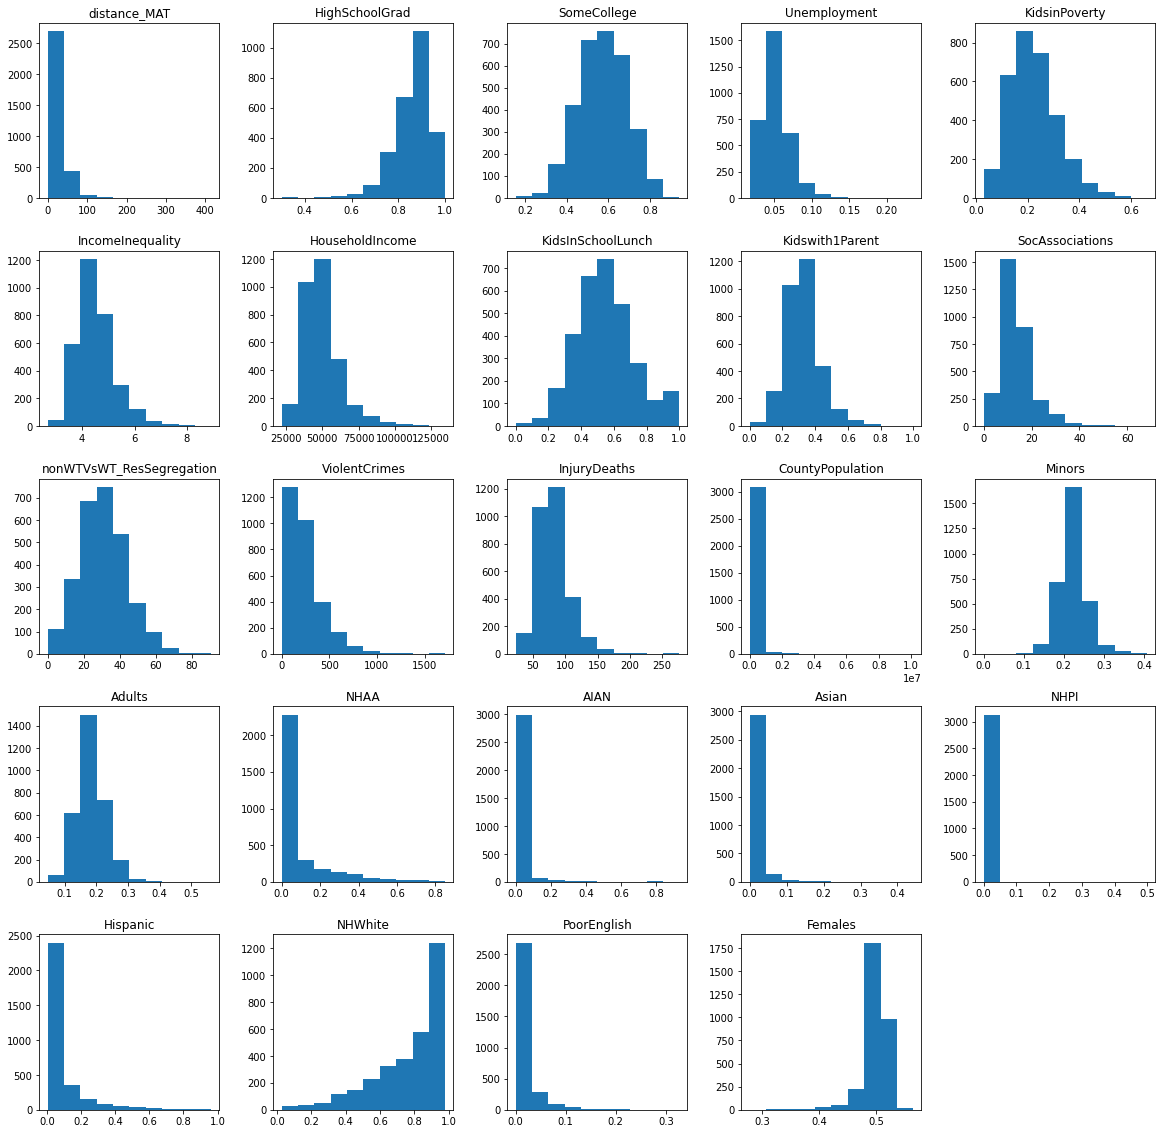

In [58]:
#Fig1a: Plot all Histograms (all at once)
df_plotData.hist(figsize=(20,20),bins=10, grid=False);
#sdoh_plotData.hist(figsize=None,bins=10)

#Note to self:
#putting a semi-colon at th end of the code suppresses the array print-out that is typically generated before the charts...
#remove gridlines with grid=False

Comments: Almost all the series/columns have skewed distributions, while a few are somewhat centered/bell-shaped (e.g. someCollege, KidsinSchoolLunch)

**E.2. Violin Plots**

Text(0.5, 1.0, 'Fig1b: Violin Plot of Percent of Kids in Poverty grouped by MAT Access')

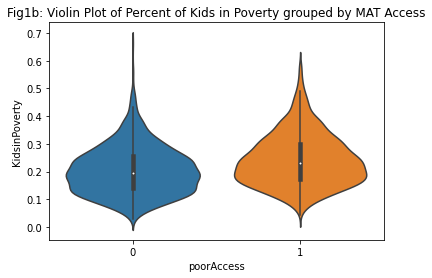

In [59]:
import seaborn as sns
#Fig2: Vertical violinplot of Population Count grouped by MAT Access
ax = sns.violinplot(x="poorAccess", y="KidsinPoverty", data=df_merge)
plt.title('Fig1b: Violin Plot of Percent of Kids in Poverty grouped by MAT Access')

Comments: The distribtion of KidsinPoverty is not much different for the categories of poorAccess

**E.3. Correlation Plots**

Text(0.5, 1.0, 'Correlation Plot of Project Dataframe Columns')

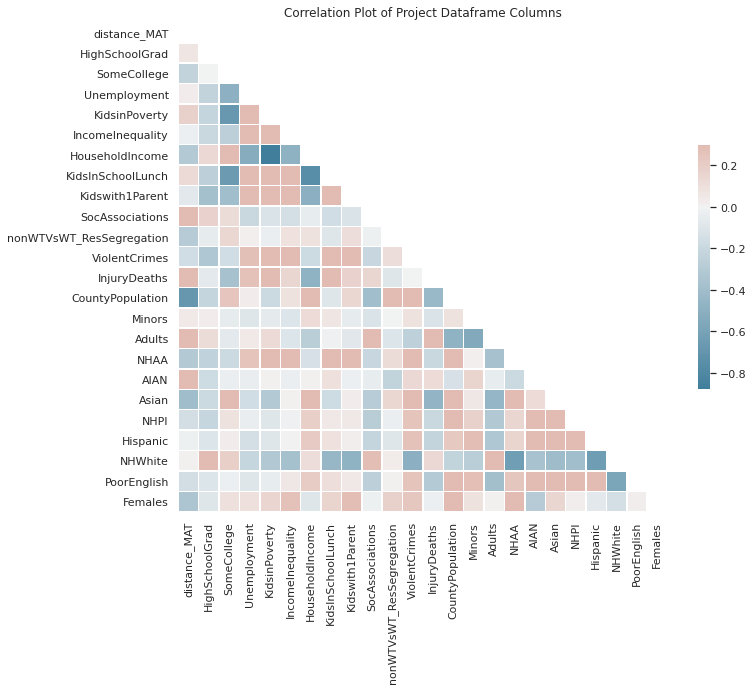

In [60]:
#Fig3: Correlation Plots
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_plotData.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Plot of Project Dataframe Columns')

Comments: Some strong but negative correlations between KidsinPoverty & SomeCollege, as well as HouseholdIncome

****
#### **Section F: Problem Applicability**
Rubric: 5 points
The program serves a theoretical purpose described in documentation, that could potentially do something in healthcare or another industry of interest
****

**Problem Applicability**

*Context*: The opioid epidemic at the forefront of public discourse in the United States in recent years is of great concern due to the devastating consequences and long-term health problems from the reliance and misuse of opioids. While there are treatments for opioid use disorder (OUD), there seems to be barriers to getting the treatment.

*Applicability in Real-World Setting*:
Determining the factors that could inhibit care for OUD would give policy makers and other key decision makers the ability to see where programs and funding are necessary to target specific groups, in order to equalize access to OUD care. If funding and programs could be targeted towards high-risk groups to improve access to OUD treatment at MAT facilities, it could lead to increased access to care and potentially help lessen the opioid epidemic in the United States. 

****
#### **Section G: Modularity/Style**
Rubric: 15 points
The code is broken up into various functions or classes to make testing and reuse easier
****

In [61]:
#Use of Functions etc... 

Comments: Functions & other utilities were created for Repeatable Processes to reduce redundancy & improve efficiency... See Utilities Section as well as Section B.4-1...

****
#### **Section H: Documentation and Professionalism**
Rubric: 15 points
All functions are documented and notebook cells include annotations and explanations.
****

In [62]:
#Note: Document functions using docstrings etc. (perhaps include docstring tests - if possible)
#include a general statement below that references these ...
#e.g. Please see individual functions & cells for annotations & explanations!

Comments: All functions & notebook cells have annotations & explanations. Please See Utility Section as well as sections B.4-1, ... for function documentation and all through the notebook for other documentation

**Rubric Summary Checklist/Recap!**

In [63]:
#Rubric Summary Checklist/Recap!

In [64]:
#1. Data Access and Formats (Max - 5 points)
#Uses data from at least two different sources:
#local file, internet, web service, relational database, AWS S3, etc; and formats: CSV, JSON, database, XML, Excel, etc)

#Yes - 3 data sources were used in this project: County Health Rankings & Roadmaps (CHR&R), amfAR & USDA data sets
#See Section A.1 above

In [65]:
#2. Data Merging (Max - 5 points)
#Data from multiple sources has to be joined together at least twice

#Yes - 3 data sources were merged twice in this project: County Health Rankings & Roadmaps (CHR&R), amfAR & USDA data sets
#Also, several other data joins were performed
#See Sections B.1, B.2 and Section D

In [66]:
#3. Data Aggregation and Pivoting (Max - 5 points)
#Data is aggregated or pivoted at least twice during the program

#Yes - See Sections C2.1, C2.2 & C2.3

In [67]:
#4. Data Transformation (Max - 5 points)
#Some kind of field-level transformation is performed at least 5 times

#Yes - See Sections D.1, D.2, D.3, D.4, D,5 etc. Also see Section B.4-3

In [68]:
#5. Data Visualization (Max - 5 points)
#The program creates 3 or more data visualizations 

#Yes - See Sections E.1, E.2 & E.3 above

In [69]:
#6. Problem Applicability (Max - 5 points)
#The program serves a theoretical purpose described in documentation, 
#that could potentially do something in healthcare or another industry of interest
 
#Yes - See Introduction Section above

In [70]:
#7. Modularity/Style (Max - 15 points)
#The code is broken up into various functions or classes to make testing and reuse easier

#Yes - Functions & other utilities were created for Repeatable Processes to reduce redundancy & improve efficiency. 
#See Utility Section above; as well as sections B.4-1, ...

In [71]:
#8. Documentation and Professionalism (Max - 15 points)
#All functions are documented and notebook cells include annotations and explanations.

#Yes - See Utility Section as well as sections B.4-1, ... for function documentation 
#and all through the notebook for other documentation

#### **The End!!!**

Thanks for the Knowledge/Learning Experience! While it was sometimes a challenge..., we persevered!!!



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add final_project.ipynb
    !git commit -a -m "Submitting the Final Project Program"
    !git push
else:
    print('''
    
OK. We can wait.
''')

---